In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import kstest
import scipy.stats as st

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [28]:
sns.set()
matplotlib.rcParams['figure.figsize'] = (12, 7)
pd.set_option('display.float_format','{:.4f}'.format)

# TEST ADF NA STACJONARNOSC

In [29]:
def adf_test(x, alpha=0.05):
    p_val = []
    is_stationary = []
    trend = ['Stała', 'Linia', 'Parabola', 'Brak']
    trends = ['c', 'ct', 'ctt', 'n']

    for i in trends:
        result = adfuller(x, regression=i, autolag='AIC')
        p = result[1]
        p_val.append(p)
        if p < alpha:
            is_stationary.append('Tak')
        else:
            is_stationary.append('Nie')

    return pd.DataFrame({
        'Trend': trend,
        'P-value': p_val,
        f'Stacjonarny (α={alpha})': is_stationary
        })

# TESTY NA NORMALNOŚĆ

In [30]:
def normality_tests(data):
    # Parametry dla rozkładu normalnego
    loc, sc = st.norm.fit(data)

    # Test Kolmogorova-Smirnova
    ks_result = st.kstest(data, 'norm', args=(loc, sc))
    ks_stat, ks_p_value = ks_result.statistic, ks_result.pvalue
    
    # Test normalności (D'Agostino i Pearson)
    normaltest_stat, normaltest_p_value = st.normaltest(data)

    # Test Shapiro-Wilka
    shapiro_stat, shapiro_p_value = st.shapiro(data)
    print(shapiro_stat,shapiro_p_value)
    
    # Interpretacja wyników
    print("Test Kolmogorova-Smirnova:")
    print(f"Statystyka: {ks_stat:.4f}, p-wartość: {ks_p_value:.4f}")
    print("Wynik testu Kolmogorova-Smirnova:")
    if ks_p_value < 0.05:
        print("Odrzucamy hipotezę zerową: dane nie pochodzą z rozkładu normalnego.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy zerowej: dane mogą pochodzić z rozkładu normalnego.")
    
    print("\nTest D'Agostino i Pearson:")
    print(f"Statystyka: {normaltest_stat:.4f}, p-wartość: {normaltest_p_value:.4f}")
    print("Wynik testu D'Agostino i Pearson:")
    if normaltest_p_value < 0.05:
        print("Odrzucamy hipotezę zerową: dane nie są normalnie rozłożone.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy zerowej: dane mogą być normalnie rozłożone.")
    
    print("\nTest Shapiro-Wilka:")
    print(f"Statystyka: {shapiro_stat:.4f}, p-wartość: {shapiro_p_value:.4f}")
    print("Wynik testu Shapiro-Wilka:")
    if shapiro_p_value < 0.05:
        print("Odrzucamy hipotezę zerową: dane nie są normalnie rozłożone.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy zerowej: dane mogą być normalnie rozłożone.")



# TEST NA ROZKLAD T - STUDENTA

In [31]:
def t_student_tests(data):
    # Parametry dla rozkładu t-Studenta
    d_f, loc, sc = st.t.fit(data)
    print(d_f, loc, sc)
    # Test t-Studenta dla średniej
    t_stat, t_p_value = st.ttest_1samp(data, popmean=loc)
    
    # Test Kolmogorova-Smirnova z rozkładem t-Studenta
    ks_stat, ks_p_value = st.kstest(data, st.t(d_f, loc, sc).cdf)
    
    # Interpretacja wyników
    print("Test t-Studenta:")
    print(f"Statystyka t: {t_stat:.4f}, p-wartość: {t_p_value:.4f}")
    print("Wynik testu t-Studenta:")
    if t_p_value < 0.05:
        print("Odrzucamy hipotezę zerową: średnia próby różni się od zadanej wartości.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy zerowej: średnia próby jest równa zadanej wartości.")
    
    print("\nTest Kolmogorova-Smirnova:")
    print(f"Statystyka: {ks_stat:.4f}, p-wartość: {ks_p_value:.4f}")
    print("Wynik testu Kolmogorova-Smirnova:")
    if ks_p_value < 0.05:
        print("Odrzucamy hipotezę zerową: dane nie pochodzą z rozkładu t-Studenta.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy zerowej: dane mogą pochodzić z rozkładu t-Studenta.")

# KURS AKCJI TSMC (daily)

[*********************100%***********************]  1 of 1 completed


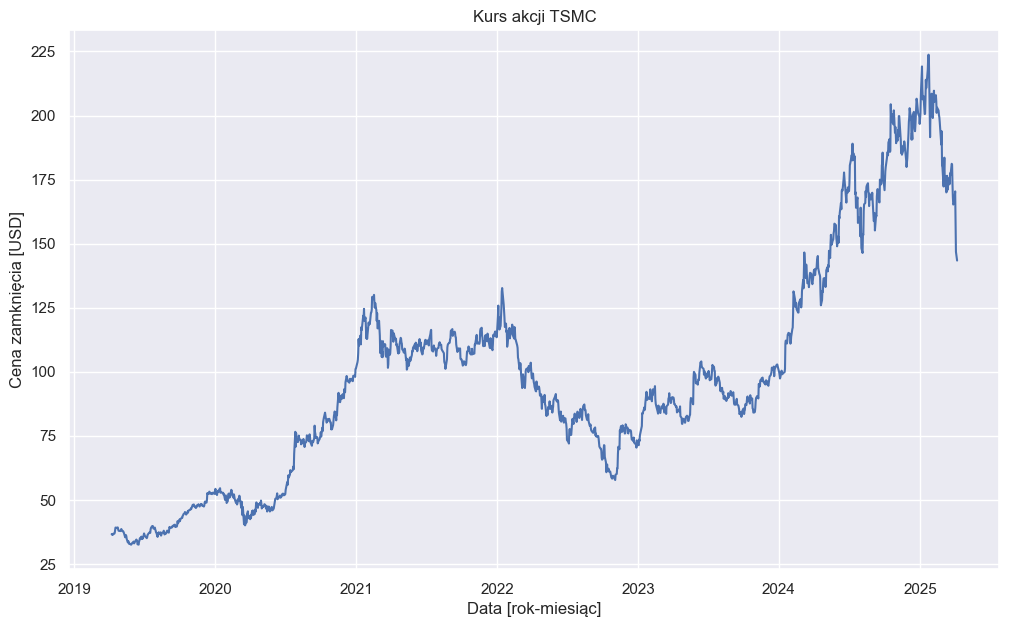

In [32]:
tsmc_data = yf.download('TSM', period = '6y')
tsmc_data = tsmc_data['Close']

plt.plot(tsmc_data)
plt.title('Kurs akcji TSMC')
plt.ylabel('Cena zamknięcia [USD]')
plt.xlabel('Data [rok-miesiąc]')
plt.grid(True)
plt.show()

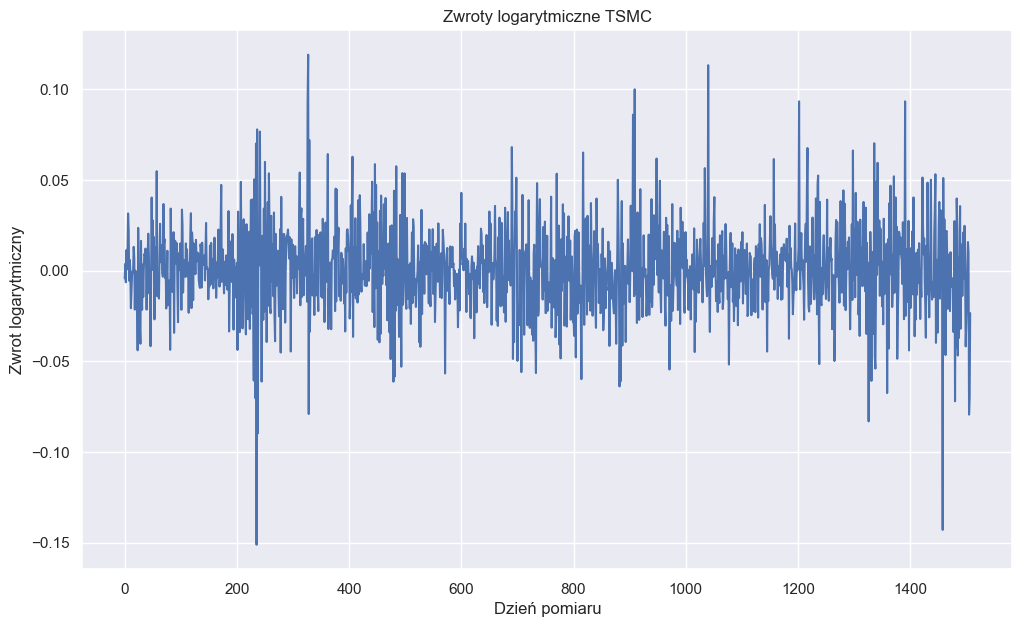

In [33]:
log_returns_tsmc = np.log(tsmc_data / tsmc_data.shift(1)).dropna()
log_returns_tsmc = np.ravel(log_returns_tsmc)

plt.plot(log_returns_tsmc)
plt.title('Zwroty logarytmiczne TSMC')
plt.ylabel('Zwrot logarytmiczny')
plt.xlabel('Dzień pomiaru')
plt.grid(True)
plt.show()


In [34]:
adf_results = adf_test(log_returns_tsmc)
print(adf_results)


      Trend  P-value Stacjonarny (α=0.05)
0     Stała   0.0000                  Tak
1     Linia   0.0000                  Tak
2  Parabola   0.0000                  Tak
3      Brak   0.0000                  Tak


____
# MIEDŹ

[*********************100%***********************]  1 of 1 completed


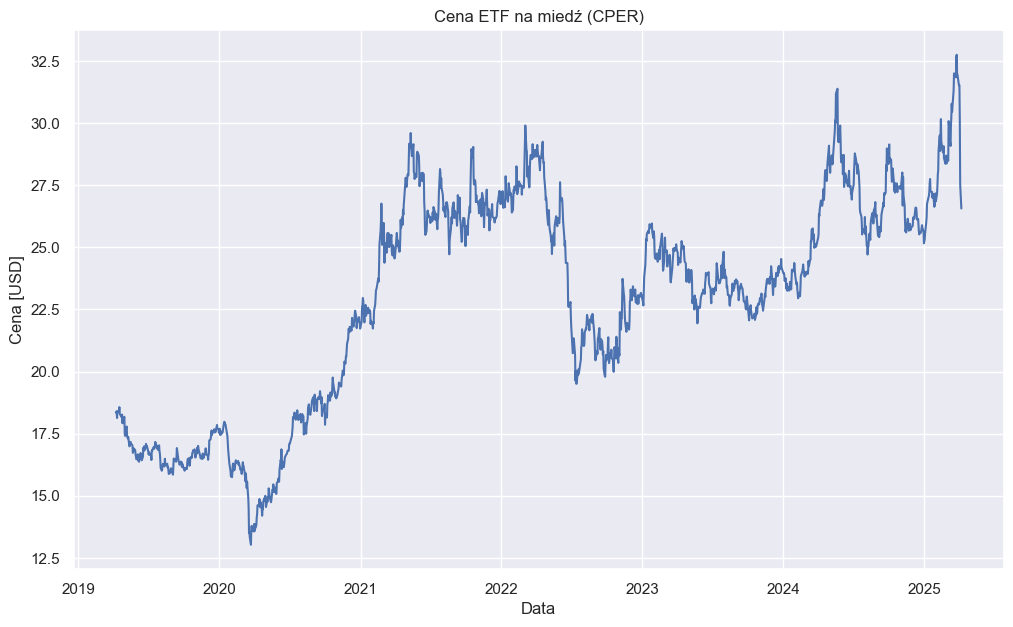

In [35]:
copper = yf.download('CPER', period='6y')['Close']

plt.plot(copper)
plt.title('Cena ETF na miedź (CPER)')
plt.ylabel('Cena [USD]')
plt.xlabel('Data')
plt.grid(True)
plt.show()

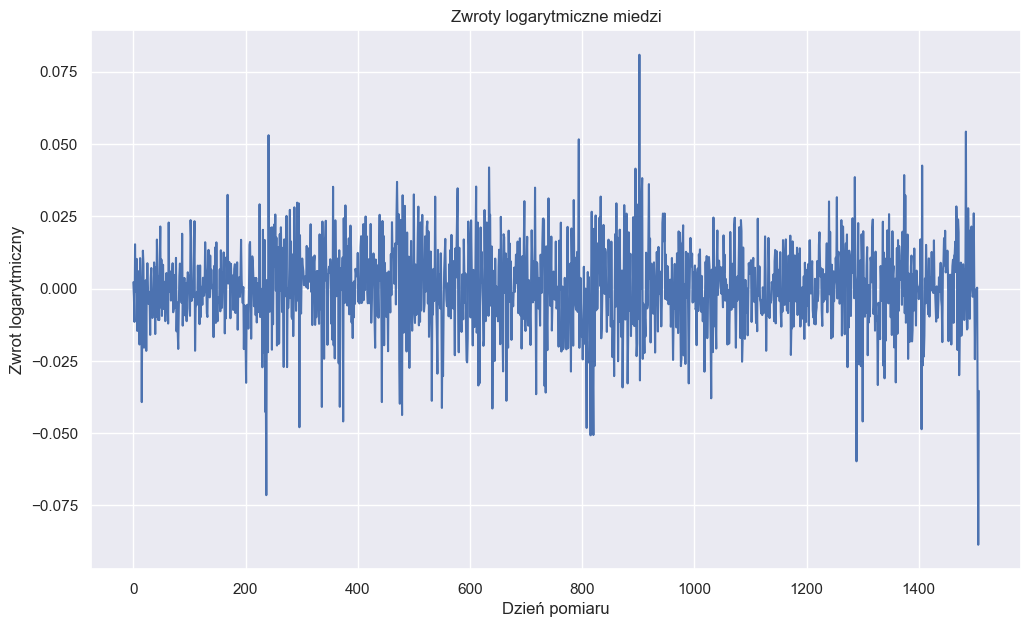

In [36]:
log_returns_copper = np.log(copper / copper.shift(1)).dropna()
log_returns_copper = np.ravel(log_returns_copper)
plt.plot(log_returns_copper)
plt.title('Zwroty logarytmiczne miedzi')
plt.ylabel('Zwrot logarytmiczny')
plt.xlabel('Dzień pomiaru')
plt.grid(True)
plt.show()


In [37]:
print(adf_test(log_returns_copper))

      Trend  P-value Stacjonarny (α=0.05)
0     Stała   0.0000                  Tak
1     Linia   0.0000                  Tak
2  Parabola   0.0000                  Tak
3      Brak   0.0000                  Tak


____ 
# Analiza jednowymiarowa TSMC

## Podejście parametryczne

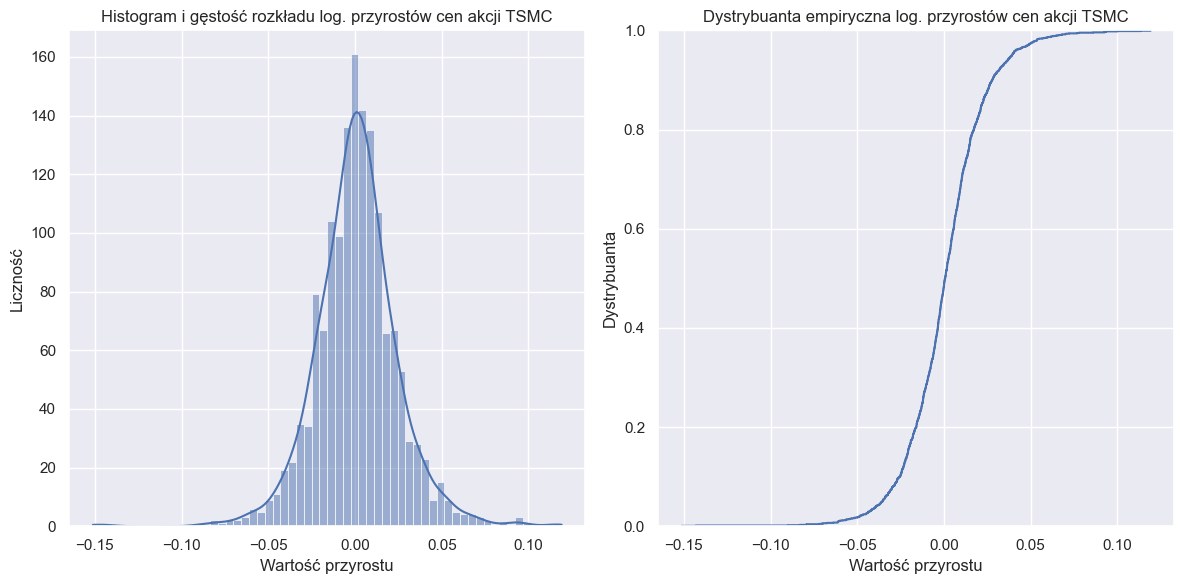

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram i gęstość rozkładu na pierwszym subplocie
sns.histplot(log_returns_tsmc, kde=True, ax=axes[0])
axes[0].set_title('Histogram i gęstość rozkładu log. przyrostów cen akcji TSMC')
axes[0].set_xlabel('Wartość przyrostu')
axes[0].set_ylabel('Liczność')

# Dystrybuanta empiryczna na drugim subplocie
sns.ecdfplot(log_returns_tsmc, ax=axes[1])
axes[1].set_title('Dystrybuanta empiryczna log. przyrostów cen akcji TSMC')
axes[1].set_xlabel('Wartość przyrostu')
axes[1].set_ylabel('Dystrybuanta')

# Wyświetlanie wykresu
plt.tight_layout()
plt.show()


In [39]:
normality_tests(log_returns_tsmc)

0.9659737920234921 2.359665571311317e-18
Test Kolmogorova-Smirnova:
Statystyka: 0.0550, p-wartość: 0.0002
Wynik testu Kolmogorova-Smirnova:
Odrzucamy hipotezę zerową: dane nie pochodzą z rozkładu normalnego.

Test D'Agostino i Pearson:
Statystyka: 130.7111, p-wartość: 0.0000
Wynik testu D'Agostino i Pearson:
Odrzucamy hipotezę zerową: dane nie są normalnie rozłożone.

Test Shapiro-Wilka:
Statystyka: 0.9660, p-wartość: 0.0000
Wynik testu Shapiro-Wilka:
Odrzucamy hipotezę zerową: dane nie są normalnie rozłożone.


In [40]:
t_student_tests(log_returns_tsmc)
d_f, loc, sc = st.t.fit(log_returns_tsmc)

4.479282615808323 0.000709525344926664 0.017880650018175598
Test t-Studenta:
Statystyka t: 0.3202, p-wartość: 0.7489
Wynik testu t-Studenta:
Nie ma podstaw do odrzucenia hipotezy zerowej: średnia próby jest równa zadanej wartości.

Test Kolmogorova-Smirnova:
Statystyka: 0.0159, p-wartość: 0.8363
Wynik testu Kolmogorova-Smirnova:
Nie ma podstaw do odrzucenia hipotezy zerowej: dane mogą pochodzić z rozkładu t-Studenta.


In [41]:
d_f, loc, sc
d_f = 5

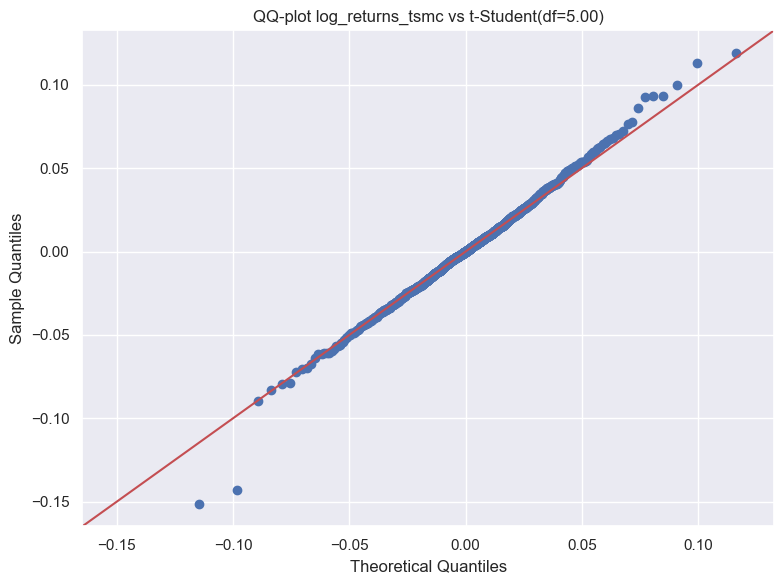

In [42]:
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sm.qqplot(log_returns_tsmc, dist=st.t(d_f, loc, sc), line='45', ax=ax)
plt.title(f'QQ-plot log_returns_tsmc vs t-Student(df={d_f:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

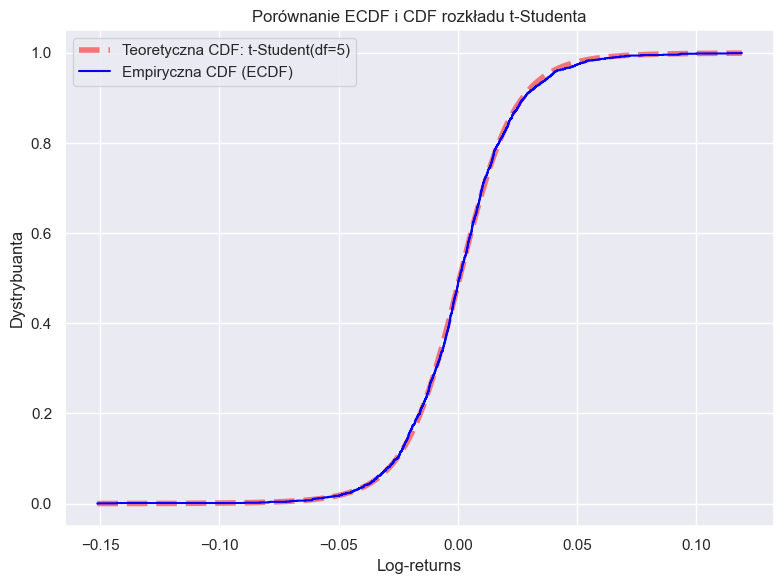

In [43]:
# Upewniamy się, że dane są 1D
log_returns_flat = np.ravel(log_returns_tsmc)

# Empiryczna dystrybuanta
ecdf = ECDF(log_returns_flat)

# Siatka do wykresu
x = np.linspace(min(log_returns_flat), max(log_returns_flat), 1000)
t_cdf = st.t.cdf(x, df=d_f, loc=loc, scale=sc)

# Wykres
plt.figure(figsize=(8, 6))
plt.plot(x, t_cdf, label=f'Teoretyczna CDF: t-Student(df={d_f})', color='red', linewidth=4, alpha=0.5, linestyle='dashed')
plt.step(ecdf.x, ecdf.y, label='Empiryczna CDF (ECDF)', where='post', color='blue')
plt.title('Porównanie ECDF i CDF rozkładu t-Studenta')
plt.xlabel('Log-returns')
plt.ylabel('Dystrybuanta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Podejście nieparametryczne

In [44]:
def parametry(X):
    '''funkcja zwraca tabele z wynikami'''
    # główne parametry
    mean = np.mean(X)
    n = len(X)
    
    # odchylenie standardow
    std = np.std(X)
    # odchylenie przeciętne
    przec_std = np.sum(np.abs(X - mean)) / (n-1)
    
    # rozstęp międzykwartylowy
    q = np.quantile(X, [0.25, 0.75])
    rozstep = q[0]-q[1]

    # odchylenie ćwiartkowe
    cwiartk = (q[1] - q[0]) / 2
    
    # semiodchylenie standardowe
    semi_std = np.sqrt(np.sum(X[X -mean>0] ** 2) / (n-1) )
    # semidochylenie przeciętne
    semi_przec = np.sum(np.abs(X[X -mean>0] - mean)) / (n-1)

    # współczynnik zmienności
    zmiennosc = std/mean

    nazwy = ['Odchylenie standardowe', 'Odchylenie przeciętne', 'Rozstęp międzykwartylowy', 'Odchylenie ćwiartkowe', 
             'Semiodchylenie standardowe', 'Semiodchylenie przeciętne', 'Średnia', 'Współczynnik zmienności']
    wartosci = [std, przec_std, rozstep, cwiartk, semi_std, semi_przec, mean, zmiennosc]
    data = pd.DataFrame({'Miara':nazwy, 'Wartość':wartosci})
    return data


In [45]:
parametry(log_returns_tsmc)

,Miara,Wartość
0,Odchylenie standardowe,0.0238
1,Odchylenie przeciętne,0.0173
2,Rozstęp międzykwartylowy,-0.0259
3,Odchylenie ćwiartkowe,0.0130
4,Semiodchylenie standardowe,0.0174
5,Semiodchylenie przeciętne,0.0086
6,Średnia,0.0009
7,Współczynnik zmienności,26.2390


In [46]:
def kwantyle(df, title, levels_df=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]):
    # wykres
    levels = np.arange(0.01, 1, 0.01)
    q = np.quantile(df, levels)
    sns.lineplot(x=levels, y=q)
    plt.title(f'Wykres kwantylowy dla {title}')
    plt.show()
    
    # tabela z wynikami
    q = np.quantile(df, levels_df)
    data = pd.DataFrame({'Kwantyl':levels_df, 'Wartość':q})
    return data

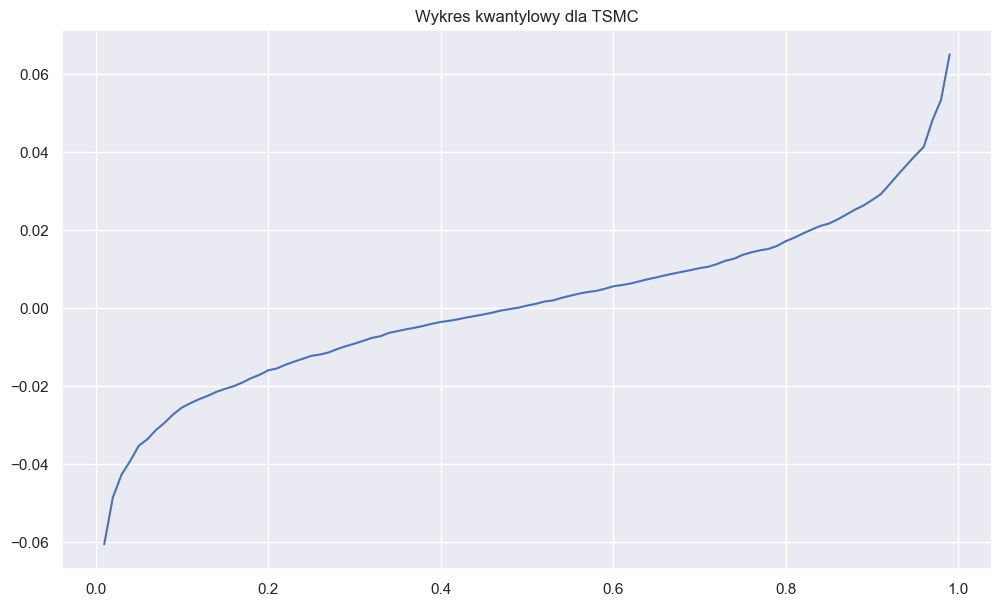

,Kwantyl,Wartość
0,0.0500,-0.0353
1,0.1500,-0.0207
2,0.2500,-0.0122
3,0.3500,-0.0059
4,0.4500,-0.0016
5,0.5500,0.0032
6,0.6500,0.0079
7,0.7500,0.0137
8,0.8500,0.0217
9,0.9500,0.0391


In [47]:
kwantyle(log_returns_tsmc, 'TSMC')

## Wartości dystrybuanty

In [48]:
def wartosc_dystrybuanty(X, wartosci=[0.01, 0.02, 0.05, 0.1, 0.15, 0.2]):
    ecdf = ECDF(X)
    data = pd.DataFrame({'Ustalona wartość':wartosci, 'wartość dystrybuanty':ecdf(wartosci)})
    return data

In [49]:
wartosc_dystrybuanty(log_returns_tsmc, [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2])

,Ustalona wartość,wartość dystrybuanty
0,0.0001,0.4901
1,0.0005,0.4987
2,0.0010,0.5066
3,0.0050,0.5922
4,0.0100,0.6950
5,0.0500,0.9735
6,0.1000,0.9980
7,0.2000,1.0000


## Podejście parametryczne

In [50]:
loc, sc = st.norm.fit(log_returns_tsmc)
loc, sc

(np.float64(0.0009054898485442677), np.float64(0.023759152274664266))

____ 
# Analiza jednowymiarowa Copper

## Podejście parametryczne


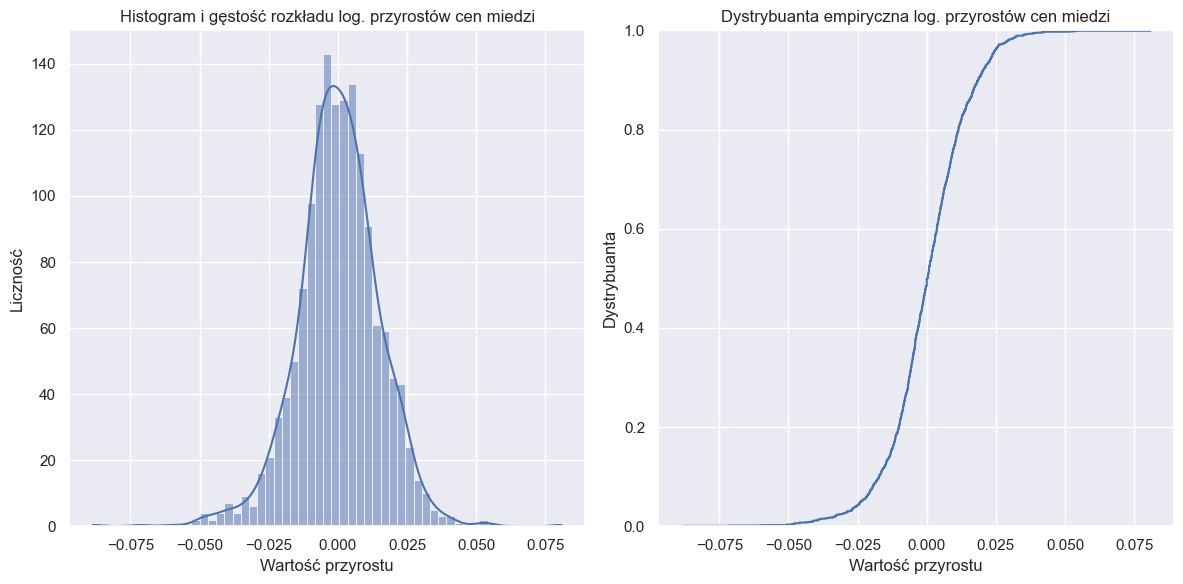

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram i gęstość rozkładu na pierwszym subplocie
sns.histplot(log_returns_copper, kde=True, ax=axes[0])
axes[0].set_title('Histogram i gęstość rozkładu log. przyrostów cen miedzi')
axes[0].set_xlabel('Wartość przyrostu')
axes[0].set_ylabel('Liczność')

# Dystrybuanta empiryczna na drugim subplocie
sns.ecdfplot(log_returns_copper, ax=axes[1])
axes[1].set_title('Dystrybuanta empiryczna log. przyrostów cen miedzi')
axes[1].set_xlabel('Wartość przyrostu')
axes[1].set_ylabel('Dystrybuanta')

# Wyświetlanie wykresu
plt.tight_layout()
plt.show()

In [52]:
normality_tests(log_returns_copper)

0.9802715776977624 1.5727481284110906e-13
Test Kolmogorova-Smirnova:
Statystyka: 0.0443, p-wartość: 0.0052
Wynik testu Kolmogorova-Smirnova:
Odrzucamy hipotezę zerową: dane nie pochodzą z rozkładu normalnego.

Test D'Agostino i Pearson:
Statystyka: 102.9248, p-wartość: 0.0000
Wynik testu D'Agostino i Pearson:
Odrzucamy hipotezę zerową: dane nie są normalnie rozłożone.

Test Shapiro-Wilka:
Statystyka: 0.9803, p-wartość: 0.0000
Wynik testu Shapiro-Wilka:
Odrzucamy hipotezę zerową: dane nie są normalnie rozłożone.


In [68]:
t_student_tests(log_returns_copper)
d_f, loc, sc = st.t.fit(log_returns_copper)
d_f = 6

6.322134959254294 0.00043638647031994703 0.01223947367283339
Test t-Studenta:
Statystyka t: -0.5009, p-wartość: 0.6165
Wynik testu t-Studenta:
Nie ma podstaw do odrzucenia hipotezy zerowej: średnia próby jest równa zadanej wartości.

Test Kolmogorova-Smirnova:
Statystyka: 0.0160, p-wartość: 0.8314
Wynik testu Kolmogorova-Smirnova:
Nie ma podstaw do odrzucenia hipotezy zerowej: dane mogą pochodzić z rozkładu t-Studenta.


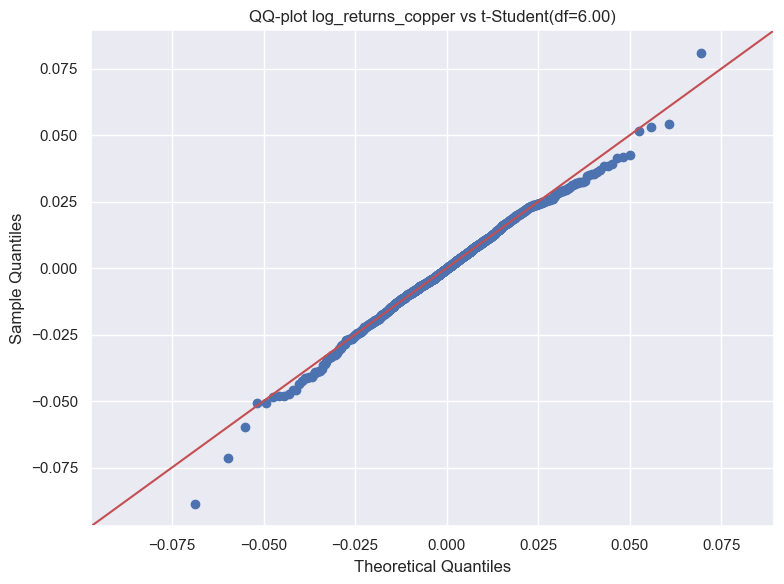

In [69]:
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sm.qqplot(log_returns_copper, dist=st.t(d_f, loc, sc), line='45', ax=ax)
plt.title(f'QQ-plot log_returns_copper vs t-Student(df={d_f:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()

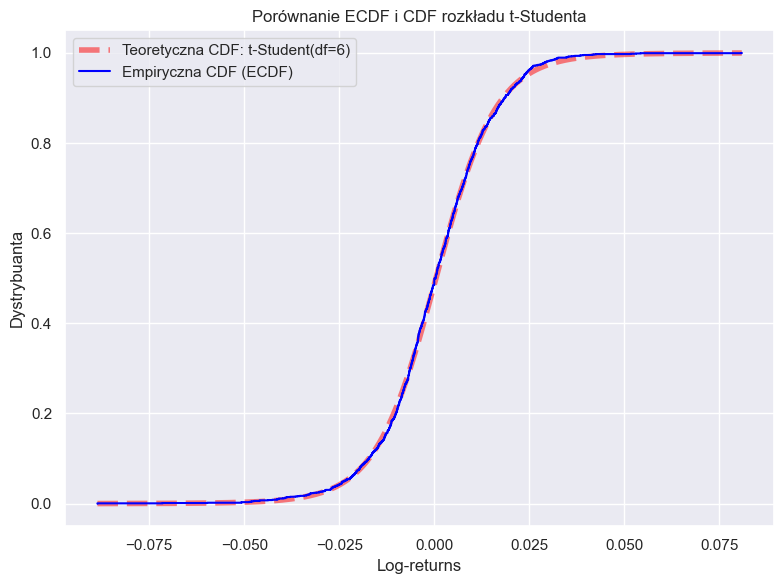

In [70]:
ecdf = ECDF(log_returns_copper)

# Siatka do wykresu
x = np.linspace(min(log_returns_copper), max(log_returns_copper), 1000)
t_cdf = st.t.cdf(x, df=d_f, loc=loc, scale=sc)

# Wykres
plt.figure(figsize=(8, 6))
plt.plot(x, t_cdf, label=f'Teoretyczna CDF: t-Student(df={d_f})', color='red', linewidth=4, alpha=0.5, linestyle='dashed')
plt.step(ecdf.x, ecdf.y, label='Empiryczna CDF (ECDF)', where='post', color='blue')
plt.title('Porównanie ECDF i CDF rozkładu t-Studenta')
plt.xlabel('Log-returns')
plt.ylabel('Dystrybuanta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Podejście nieparametryczne

In [71]:
parametry(log_returns_copper)

,Miara,Wartość
0,Odchylenie standardowe,0.0148
1,Odchylenie przeciętne,0.0112
2,Rozstęp międzykwartylowy,-0.0173
3,Odchylenie ćwiartkowe,0.0087
4,Semiodchylenie standardowe,0.0104
5,Semiodchylenie przeciętne,0.0056
6,Średnia,0.0002
7,Współczynnik zmienności,60.3841


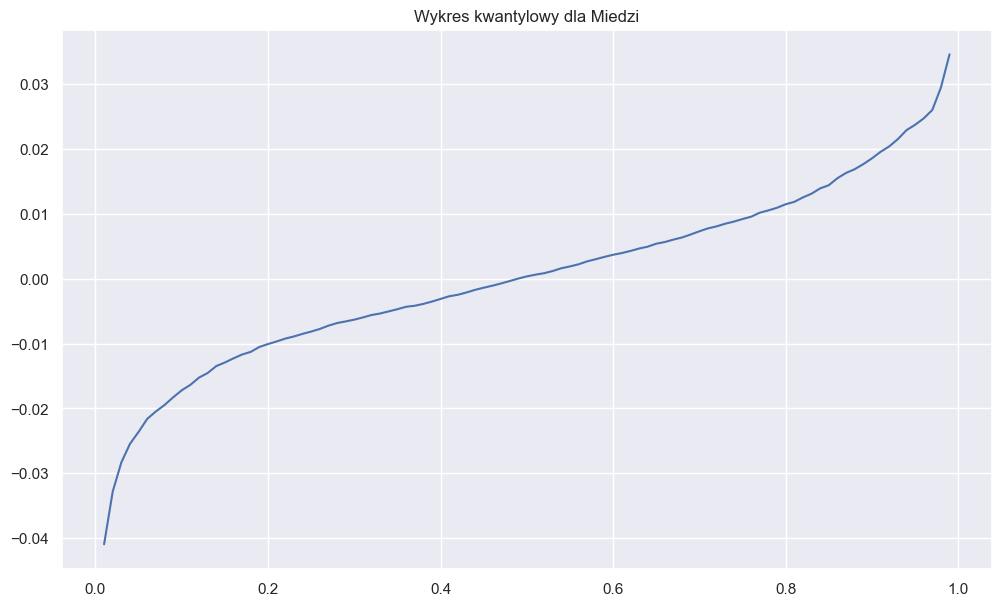

,Kwantyl,Wartość
0,0.0500,-0.0236
1,0.1500,-0.0129
2,0.2500,-0.0082
3,0.3500,-0.0047
4,0.4500,-0.0014
5,0.5500,0.0019
6,0.6500,0.0054
7,0.7500,0.0092
8,0.8500,0.0144
9,0.9500,0.0237


In [72]:
kwantyle(log_returns_copper, 'Miedzi')

In [73]:
wartosc_dystrybuanty(log_returns_copper, [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2])

,Ustalona wartość,wartość dystrybuanty
0,0.0001,0.4993
1,0.0005,0.5073
2,0.0010,0.5245
3,0.0050,0.6419
4,0.0100,0.7679
5,0.0500,0.9973
6,0.1000,1.0000
7,0.2000,1.0000


In [74]:
loc, sc = st.norm.fit(log_returns_copper)
loc, sc

(np.float64(0.0002452799236633689), np.float64(0.014811009620716539))

____ 
# Analiza jednowymiarowa Kurs

## Podejście parametryczne

## Podejście nieparametryczne